In [3]:
import os
import camelot
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# load pdf file from data folder and extract tables
tables = load_tables_from_pdf('../../data/r5_ecoset_Supplemental_Appendix_Table.pdf', '1-end')
df_ecoset = transform_tables_to_df(tables)
ecoset_concepts = [i if i not in ['', 'category name', ' '] else i for i in df_ecoset['category name'].values]

In [7]:
leuven_animals = read_leuven_norms_as_df('../../data/LeuvenNorms/ANIMALSexemplarfeaturesbig.txt')
leuven_artifacts = read_leuven_norms_as_df('../../data/LeuvenNorms/ARTIFACTSexemplarfeaturesbig.txt')
leuven_animals_names = list(leuven_animals.columns[2:])
leuven_artifacts_names = list(leuven_artifacts.columns[2:])
leuven_concepts = leuven_animals_names + leuven_artifacts_names

In [8]:
# find the overlap between ecoset and leuven
overlap = [i for i in ecoset_concepts if i in leuven_concepts]

# Ecoset overlap

In [9]:
# subset df_ecoset to only include the overlap elements in the column 'category name'
df_ecoset_overlap = df_ecoset[df_ecoset['category name'].isin(overlap)]

# find the sum of the values in the column # of\nimages
# first convert the values in the column to int
df_ecoset_overlap['# of\nimages'] = df_ecoset_overlap['# of\nimages'].astype(int)
# then sum the values
sum(df_ecoset_overlap['# of\nimages'])

/home/siddsuresh97/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


314935

In [11]:
# Check the correlation between columns FCI nad # of\nimages
df_ecoset_overlap['FCI'] = df_ecoset_overlap['FCI'].astype(float)
df_ecoset_overlap['# of\nimages'] = df_ecoset_overlap['# of\nimages'].astype(int)
df_ecoset_overlap[['FCI', '# of\nimages']].corr()

# Check if this correlation is significant
from scipy.stats import pearsonr
pearsonr(df_ecoset_overlap['FCI'], df_ecoset_overlap['# of\nimages'])

/home/siddsuresh97/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/siddsuresh97/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(0.32977560410982093, 0.001930693260040591)

# Leuven

In [12]:
#combine the leuven_animals and leuven_artifacts, the first column in leuven_animals is feature/_exemplar_ENGLISH and the first column in leuven_artifacts is Item

leuven_animals = leuven_animals.rename(columns={'feature/_exemplar_ENGLISH': 'Item'})
leuven = pd.concat([leuven_animals, leuven_artifacts], axis=0, ignore_index=True)

#replace all the NaN values with 0
leuven = leuven.fillna(0)

#divide all values by FFrq column
leuven = leuven.iloc[:, 2:].div(leuven['FFrq'], axis=0)

#transpose the df
leuven = leuven.T

## Tree plot with mds

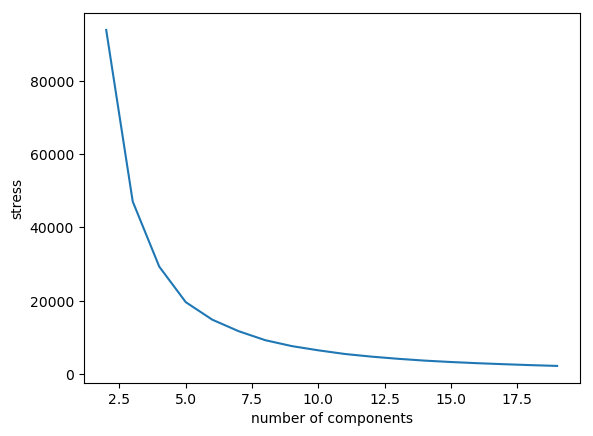

In [14]:
# do mds on the leuven df with dimension ranging from 2 to 10 to find the best dimension for the mds by plotting the stress on the y-axis and the number of dimensions on the x-axis

from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt
import numpy as np

# calculate the distance matrix
distance_matrix = euclidean_distances(leuven)

# do mds on the distance matrix with dimension ranging from 2 to 10 to find the best dimension for the mds by plotting the stress on the y-axis and the number of dimensions on the x-axis
stress = []
for i in range(2, 20):
    mds = MDS(n_components=i, dissimilarity='precomputed')
    mds.fit(distance_matrix)
    stress.append(mds.stress_)

plt.plot(range(2, 20), stress)
plt.xlabel('number of components')
plt.ylabel('stress')
plt.show()


In [12]:
#do mds on the leuven data and set the rownames of leuven as the index of the mds
from sklearn.manifold import MDS
mds = MDS(n_components=6, random_state=0)
leuven_mds = mds.fit_transform(leuven)
leuven_mds = pd.DataFrame(leuven_mds, index=leuven.index)

# Ecoset, leuven overlap Look at number of images per class

## dendogram of overlap categories

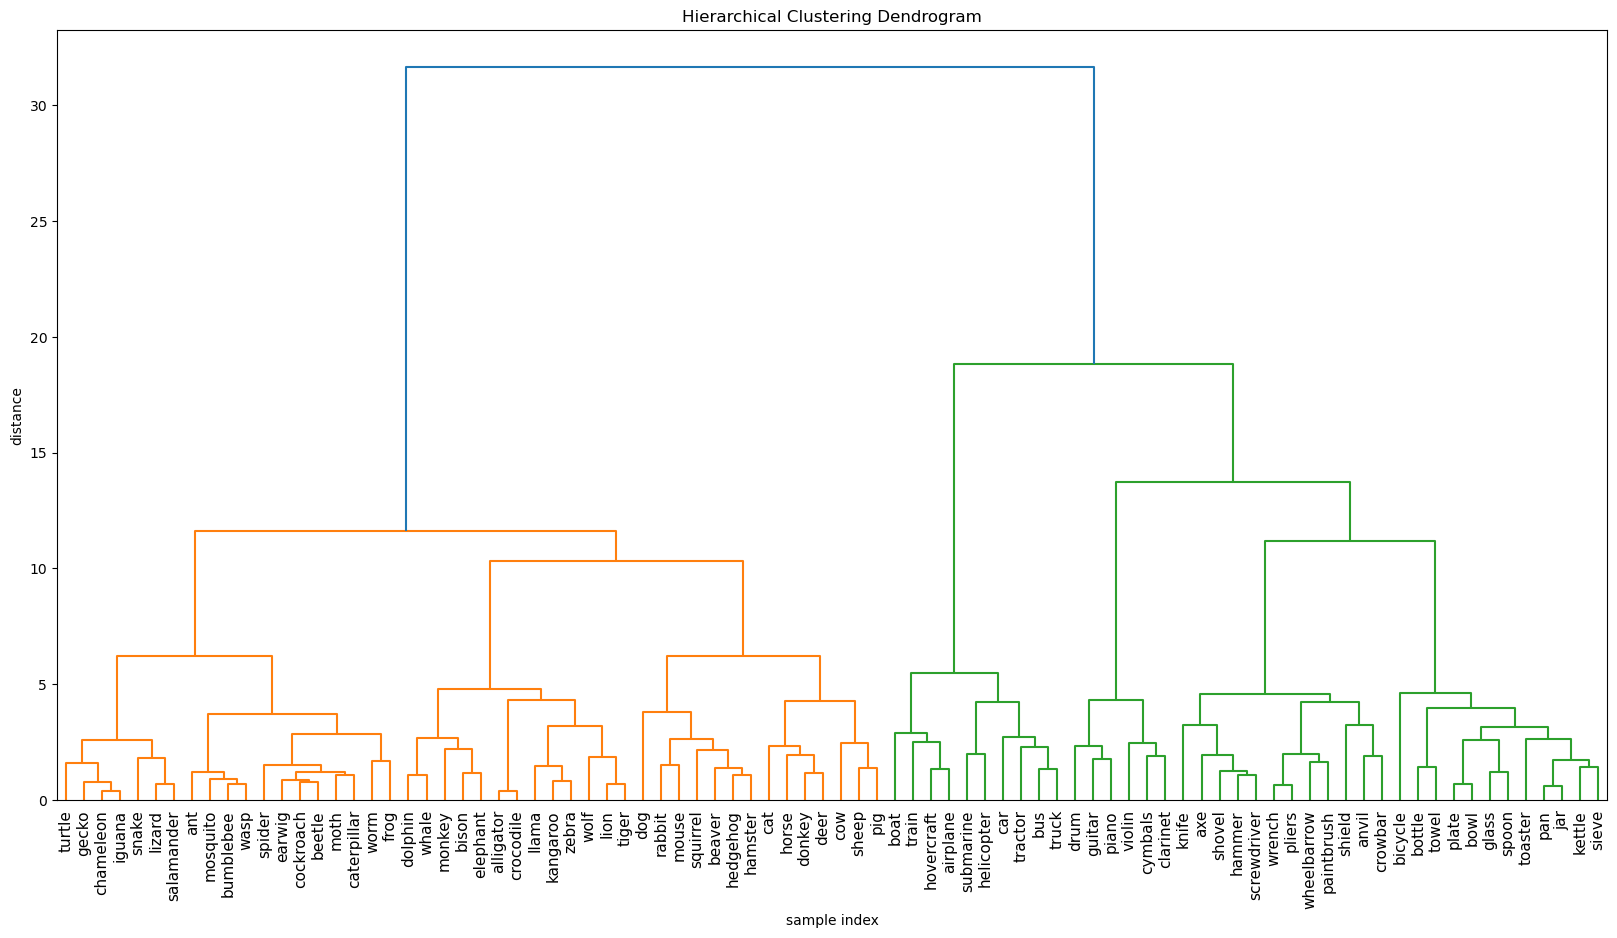

In [20]:
# make a new df from leuven mds and chose index that exist in df_ecoset_overlap
leuven_mds_overlap = leuven_mds[leuven_mds.index.isin(df_ecoset_overlap['category name'])]

# plot hierarchical clustering dendrogram of the leuven_mds_overlap
plot_dendogram(leuven_mds_overlap, labels = leuven_mds_overlap.index, figsize=(20, 10))


## Training data size, split

In [23]:
# sum the values in the column # of\nimages in df_ecoset_overlap
df_ecoset_overlap['# of\nimages'] = df_ecoset_overlap['# of\nimages'].astype(int)
sum(df_ecoset_overlap['# of\nimages'])

/Users/siddharthsuresh/miniconda3/envs/vision_robustness_using_semantic_norms/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


314935